# Assignment 10 - Data Analytics III

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("iris.csv")

In [3]:
# Features Explanation

# sepal_length: Length of the sepal (in centimeters).
# sepal_width: Width of the sepal (in centimeters).
# petal_length: Length of the petal (in centimeters).
# petal_width: Width of the petal (in centimeters).
# species: Species of iris plant (Setosa, Versicolor, Virginica).

df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [5]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

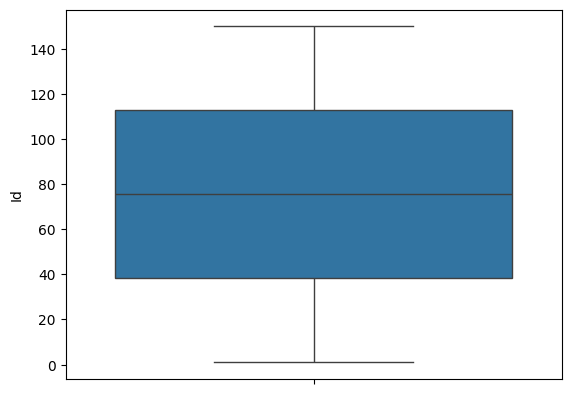

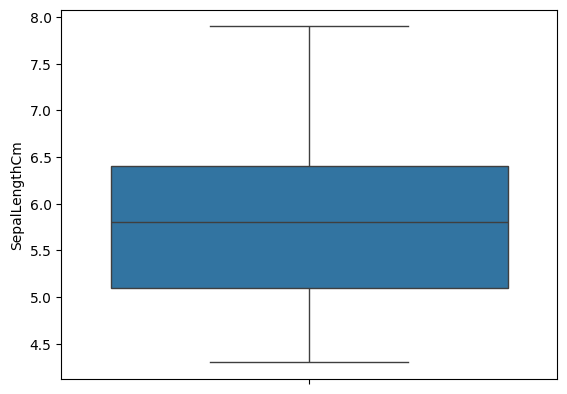

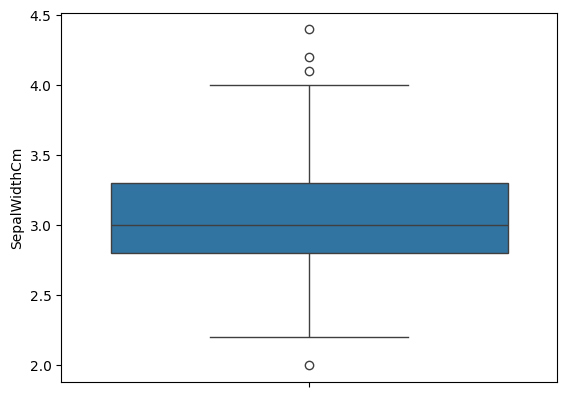

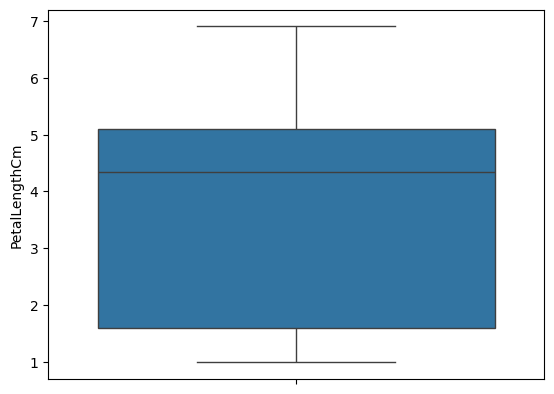

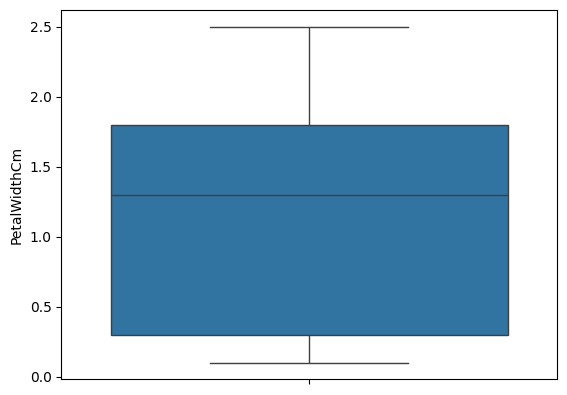

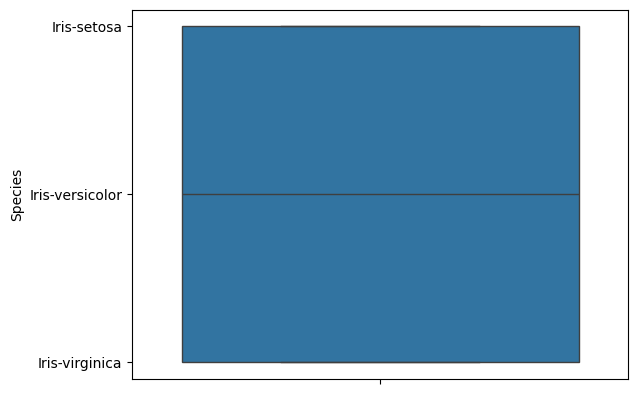

In [6]:
for column in df.columns:
    sns.boxplot(df[column])
    plt.show()

In [7]:
Q1 = df["SepalWidthCm"].quantile(0.25)
Q3 = df["SepalWidthCm"].quantile(0.75)

IQR = Q3-Q1

min_range = Q1-1.5*IQR
max_range = Q3+1.5*IQR

df.drop(df[df["SepalWidthCm"] < min_range].index, inplace=True)
df.drop(df[df["SepalWidthCm"] > max_range].index, inplace=True)

df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


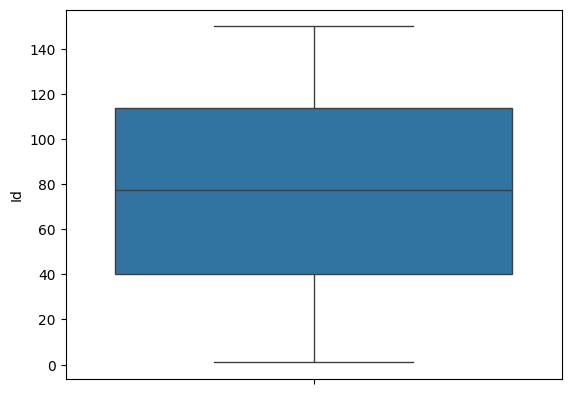

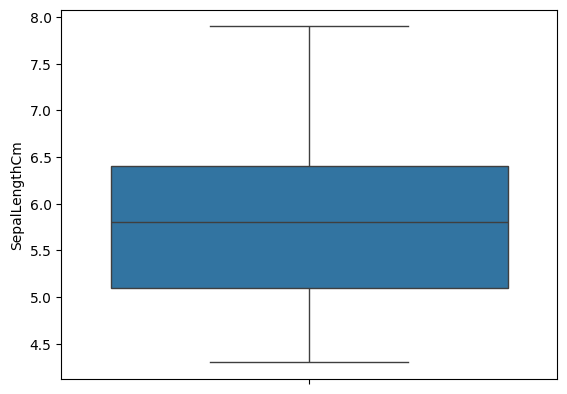

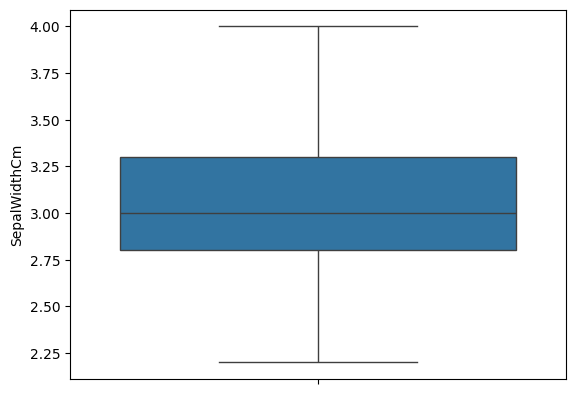

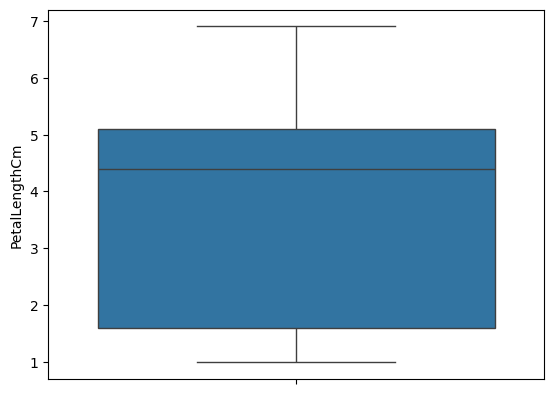

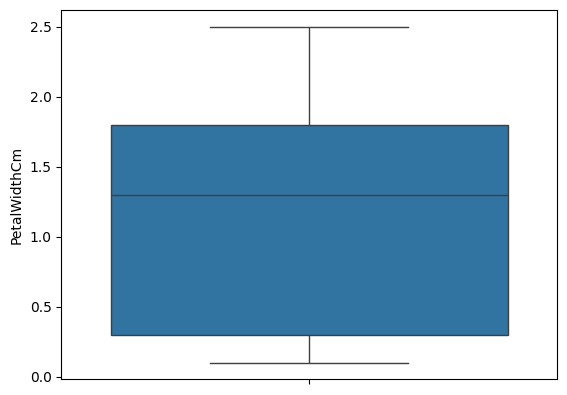

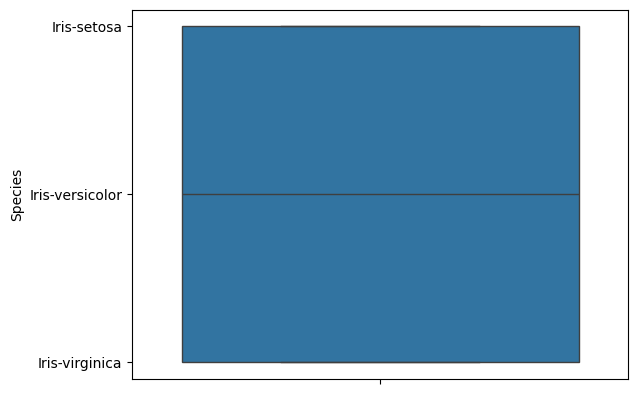

In [8]:
for column in df.columns:
    sns.boxplot(df[column])
    plt.show()

In [9]:
df["Species"] = df["Species"].astype("category").cat.codes

In [10]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
count,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000
mean,76.582192,5.856849,3.036986,3.807534,1.219863,1.020548
std,43.453305,0.834093,0.395145,1.757117,0.760365,0.817643
min,1.000000,4.300000,2.200000,1.000000,0.100000,0.000000
25%,40.250000,5.100000,2.800000,1.600000,0.300000,0.000000
50%,77.500000,5.800000,3.000000,4.400000,1.300000,1.000000
75%,113.750000,6.400000,3.300000,5.100000,1.800000,2.000000
max,150.000000,7.900000,4.000000,6.900000,2.500000,2.000000


In [11]:
X = df.drop(["Id", "Species", "SepalWidthCm"], axis=1)
Y = df["Species"]

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.2, random_state=42)

In [13]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, Y_train)

GaussianNB()

In [14]:
Y_pred = gnb.predict(X_test)
Y_pred

array([0, 2, 0, 0, 0, 2, 0, 1, 2, 0, 0, 1, 2, 1, 2, 0, 1, 2, 0, 1, 2, 2,
       0, 1, 0, 1, 1, 2, 2, 0, 0, 0, 2, 2, 0, 0, 2, 1, 1, 1, 2, 2, 2, 0,
       2, 2, 0, 0, 2, 0, 0, 0, 1, 1, 0, 0, 2, 0, 1, 1, 0, 1, 2, 2, 2, 2,
       2, 0, 1, 1, 1, 2, 1, 1, 0, 2, 1, 2, 0, 1, 0, 2, 0, 0, 1, 2, 1, 2,
       2, 1, 0, 0, 2, 2, 0, 0, 0, 2, 2, 0, 2, 2, 0, 2, 1, 1, 2, 0, 2, 1,
       2, 2, 2, 1, 0, 1, 1], dtype=int8)

In [15]:
gnb.score(X_test, Y_test)*100

93.16239316239316

In [16]:
from sklearn.metrics import confusion_matrix
cfm = confusion_matrix(Y_test, Y_pred)

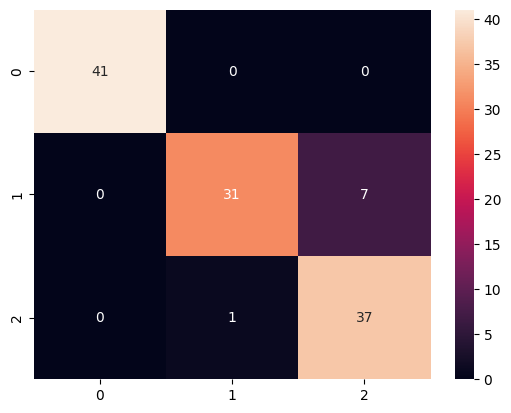

In [17]:
sns.heatmap(cfm, annot=True)
plt.show()

In [22]:
from sklearn.metrics import accuracy_score, classification_report
Accuracy_Score = accuracy_score(Y_test, Y_pred)
Error_Rate = 1-Accuracy_Score
Classification_Report = classification_report(Y_test, Y_pred)

print("Accuracy : ", Accuracy_Score*100)
print("Error Rate : ", Error_Rate*100)
print("Classification Report -->")
print(Classification_Report)

Accuracy :  93.16239316239316
Error Rate :  6.8376068376068355
Classification Report -->
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        41
           1       0.97      0.82      0.89        38
           2       0.84      0.97      0.90        38

    accuracy                           0.93       117
   macro avg       0.94      0.93      0.93       117
weighted avg       0.94      0.93      0.93       117

